In [5]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.risk as risk
import mlgrad.avragg as avragg
# import mlgrad.gd as gd
# import mlgrad.regnorm as regnorm
import mlgrad.weights as weights
# from mlgrad.utils import array_exclude_outliers

import mlgrad.regr as regr
# import mlgrad.cls as cls

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk, mrisk

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-ticks'])

import sys
print(sys.version)

3.10.8 (main, Nov  4 2022, 09:21:25) [GCC 12.2.0]


In [6]:
anames = [('a%s' % i) for i in range(1,35)]
df = pd.read_csv("data/ionosphere.data", sep=',', names=anames+['cls'])

In [7]:
len(df)

351

In [8]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,cls
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,-1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [35]:
X = np.c_[tuple(df[name] for name in anames)]
X = np.asarray(X, dtype='d')
# Y = df["cls"].values
# Y = np.asarray(Y, dtype='d')

# X -= np.median(X)
# Y -= np.median(Y)

# x_min, x_max = X.min(), X.max()
# X = (X - x_min) / (x_max - x_min)
# y_min, y_max = Y.min(), Y.max()
# Y = (Y - y_min) / (y_max - y_min)

Xs = X

# X0 = np.linspace(X.min(), X.max(), 20)

n = len(anames)
print(Xs.shape)

(351, 34)


In [36]:
from sklearn.preprocessing import scale
X = scale(X)
X0 = X
N = len(X)

In [27]:
from sklearn.decomposition import PCA

<BarContainer object of 34 artists>

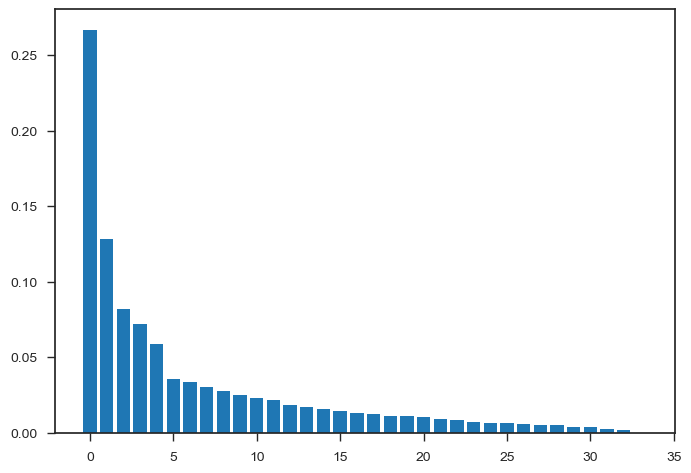

In [28]:
pca_sk = PCA()
pca_sk.fit(X)
plt.bar(range(34), pca_sk.explained_variance_ratio_)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca
from mlgrad.pca.location_scatter import robust_scatter_matrix

[ 1.92944742e-17  0.00000000e+00  1.57044368e-16 -4.22264313e-17
  5.44673518e-16 -5.86741798e-17 -4.34283821e-16  1.90216630e-16
 -8.32825420e-16 -1.91363228e-16  3.90634027e-16 -1.00268005e-16
 -1.94209954e-16  5.72508169e-17 -2.12555519e-16  2.26630996e-16
 -4.65281501e-16 -5.45622427e-18 -2.81509542e-17  3.18279749e-18
 -9.77375825e-17  5.67763627e-17 -4.15305650e-16 -5.10829112e-17
  1.11022302e-16  1.74757328e-17 -1.04063640e-16 -8.77542736e-17
  5.16838867e-16 -5.79229605e-18 -2.20146788e-16  3.83517213e-18
 -1.45499314e-17  4.74454284e-18]


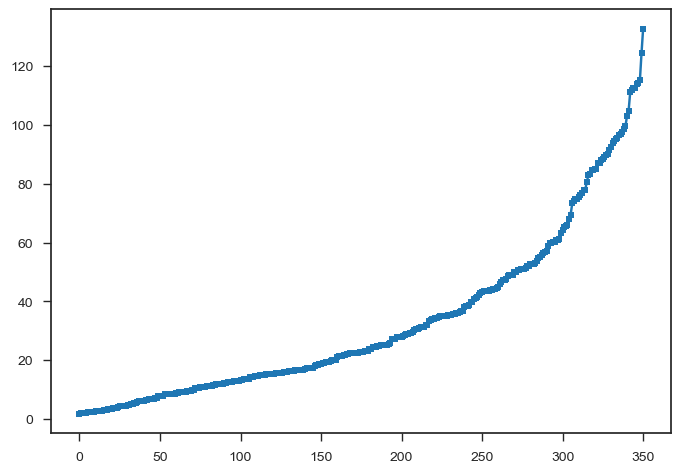

In [40]:
c0 = pca.find_center(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[-0.03069373  0.          0.06300577  0.06087119  0.00742597 -0.00312745
 -0.005399   -0.03274998 -0.04854853 -0.07963114 -0.01371009  0.00703307
  0.00619348  0.01463968 -0.0387968  -0.07751536 -0.04899784 -0.05486286
 -0.04569961  0.04667499 -0.03167932  0.0698854   0.01110328  0.01170765
 -0.02689772  0.01071984  0.01103839 -0.04643312 -0.05939563  0.0588633
 -0.01495897  0.0389767  -0.0444595   0.04747561]


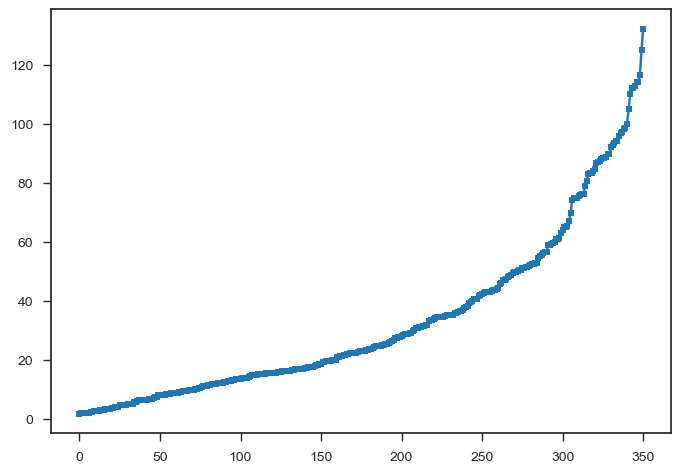

In [41]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-10)/N)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [43]:
X1 = X0 - c
X1_0 = X0 - c0

In [44]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

8.81214220638724 [ 0.04500813  0.          0.12026187 -0.09765813  0.16866847 -0.09364456
  0.20580294 -0.1632732   0.2361839  -0.16035941  0.25446432 -0.13568538
  0.26634373 -0.10227892  0.28391315 -0.09736116  0.27733931 -0.01656199
  0.27480432 -0.00923703  0.28014562  0.06239998  0.26140764  0.01618491
  0.22540272  0.0402731   0.18380931  0.0561506   0.20715326  0.01394215
  0.21044119  0.01866462  0.22352839 -0.02753889]


In [45]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-10)/N)
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)

8.71947342194887 [ 0.0453632   0.          0.13071249 -0.10990851  0.15156805 -0.1132395
  0.20614046 -0.15616042  0.22704788 -0.14224079  0.25100978 -0.12024567
  0.25779707 -0.09945918  0.29612868 -0.07756149  0.27953505 -0.01606856
  0.28627946  0.00346495  0.27973839  0.05889287  0.25741952  0.01895758
  0.24193289  0.05207525  0.18746829  0.0693183   0.20063626  0.0060965
  0.21368446  0.03230299  0.22183553 -0.02608662]


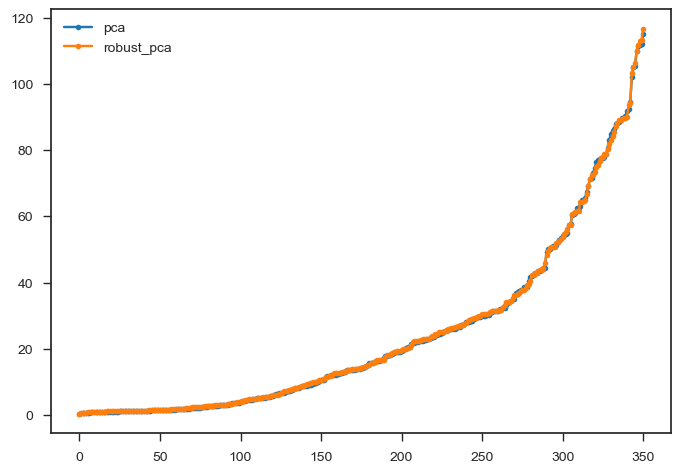

In [46]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, label='robust_pca')
plt.legend()
plt.show()

In [23]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.9)
S = robust_scatter_matrix(X, wma)
print(S)

LinAlgError: SVD did not converge

In [7]:
# loss_func_h = loss.MarginLoss(func.Hinge())
# loss_func_rsq = loss.RelativeErrorLoss(func.Square())
# loss_func_abs = loss.ErrorLoss(func.Absolute())

In [8]:
# sqr_norm = regnorm.SquareNorm()

In [9]:
mod_svm = model.LinearModel(n)
mod_svm.init()

[0.25616861 0.20772138 0.93235367 0.04801034 0.7011313  0.13767516
 0.75676653 0.43851366 0.35926466 0.75079914 0.8113924  0.72124294
 0.64731022 0.87015119 0.18749231 0.93693386 0.54195831 0.53817369
 0.10155088 0.61014114 0.21740542 0.24699807 0.5887753  0.00700992
 0.97539312 0.52505197 0.50826857 0.2997125  0.4557851  0.70804401
 0.86596848 0.26530391 0.4513028  0.82078701 0.65791575] 35


K=1500 param=[-0.69484516 -0.23334772  0.93235367  0.72145354  0.55915036  0.60885508
  0.90482036  0.27422007  0.89679541  0.15421554  0.17995413 -0.05987696
  0.00288214  0.1404222   0.21806688  0.43645096 -0.06615357 -0.03740126
  0.2648502   0.20265391 -0.39164939  0.15790293 -0.43748995  0.1330025
 -0.04060829  0.05543489  0.35702734 -0.65371882  0.07726445  0.04941703
  0.1741145   0.40118926 -0.29666352  0.00479168 -0.42756295]


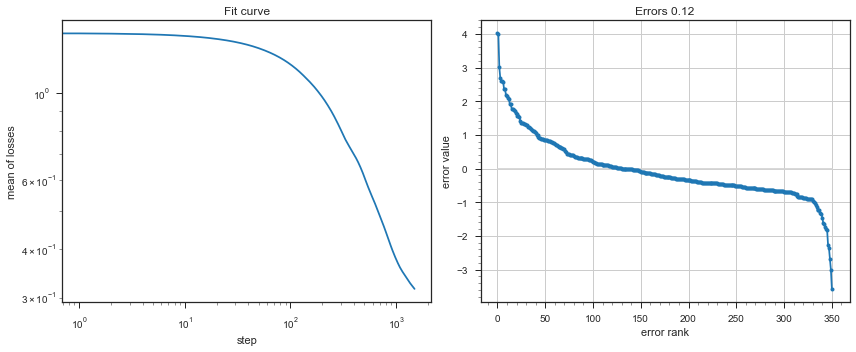

In [10]:
alg_svm = clsfy.classification_as_regr(Xs, Y, mod_svm, n_iter=1500, verbose=1)
err_ls = clsfy.plot_losses_and_errors(alg_svm, Xs, Y)

In [11]:
mod_svm_wm = model.LinearModel(n)
mod_svm_wm.init()

[0.23149231 0.68447035 0.47493046 0.45010182 0.13796554 0.17636849
 0.78798722 0.44517916 0.57601378 0.19196688 0.4550939  0.49108681
 0.60803365 0.82580657 0.03844879 0.45789806 0.40539274 0.33248981
 0.14663728 0.64260433 0.35000176 0.65715363 0.38041247 0.05700031
 0.96866209 0.37520286 0.79458581 0.9477381  0.7493266  0.40872304
 0.02537871 0.66883555 0.89103564 0.42818078 0.20235367] 35


K=100 param=[-8.49643394  6.22179728  0.47493046  1.9228142  -1.34134009  4.4837384
  2.34102817  2.46345561  2.49887519  0.80526185  3.23116781 -1.37200298
 -0.41065733 -1.76072645 -0.94916338  2.58835275 -2.89964213 -0.32355573
  1.75219943 -1.97290611 -1.10266759 -0.26347731 -2.87101001  1.29960311
 -1.20973673  2.88265511  1.86002099 -7.41498359  6.34441665 -1.03702417
  4.43744493  1.16817503 -4.10531139  3.18081435 -4.07776156]


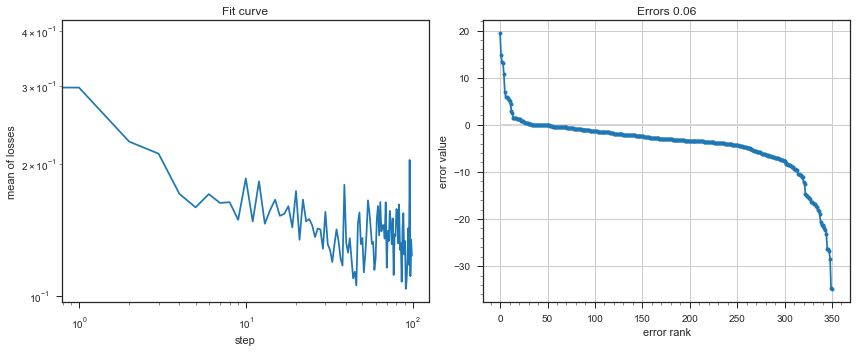

In [12]:
avg_svm_wm = regr.averaging_function('WM', rhofunc=func.Quantile_Sqrt(0.96, 0.001))
alg_svm_wm = clsfy.classification_as_mregr(Xs, Y, mod_svm_wm, avrfunc=avg_svm_wm, 
                                           h=0.001, n_iter2=100, verbose=1)
err_svm_wm = clsfy.plot_losses_and_errors(alg_svm_wm, Xs, Y)